# Stohastička dinamika

## Diferencijalna jednačina koja opisuje ponašanje sistema: $\frac{dn}{dt} = \phi - \lambda n$

### Rešenje: 

### \begin{equation}
    \frac{dn}{dt} + \lambda n = \phi
\end{equation}

### \begin{equation}
    n(t) = \frac{\phi}{\lambda} + Ce^{-\lambda t}
\end{equation}

### Za n = 0 i t = 0:

### \begin{equation}
    0 = {\phi}{\lambda} + C \Rightarrow C = -\frac{\phi}{\lambda}
\end{equation}

### \begin{equation}
    n(t) = \frac{\phi}{\lambda} + (-\frac{\phi}{\lambda})e^{-\lambda t}
\end{equation}

### \begin{equation}
    n(t) = \frac{\phi}{\lambda}(1 - e^{-\lambda t})
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

In [2]:
# Gilespijev algoritam
def gillespie(phi, lam, T):
    t = 0.0
    n = 0

    times = [t]
    counts = [n]

    while t < T:
        a1 = phi
        a2 = lam * n
        a0 = a1 + a2

        tau = np.random.exponential(1.0 / a0)
        t = t + tau

        if np.random.rand() < a1 / a0:
            n += 1
        else:
            n -= 1

        times.append(t)
        counts.append(n)

    return np.array(times), np.array(counts), n

In [3]:
# Resenje diferencijalne j-ne
def deterministic(phi, lam, t):
    return (phi / lam) * (1 - np.exp(-lam * t))

In [4]:
# Parametri
lam = 0.01
phis = [0.1, 1.0]

T = 500
N = 1000

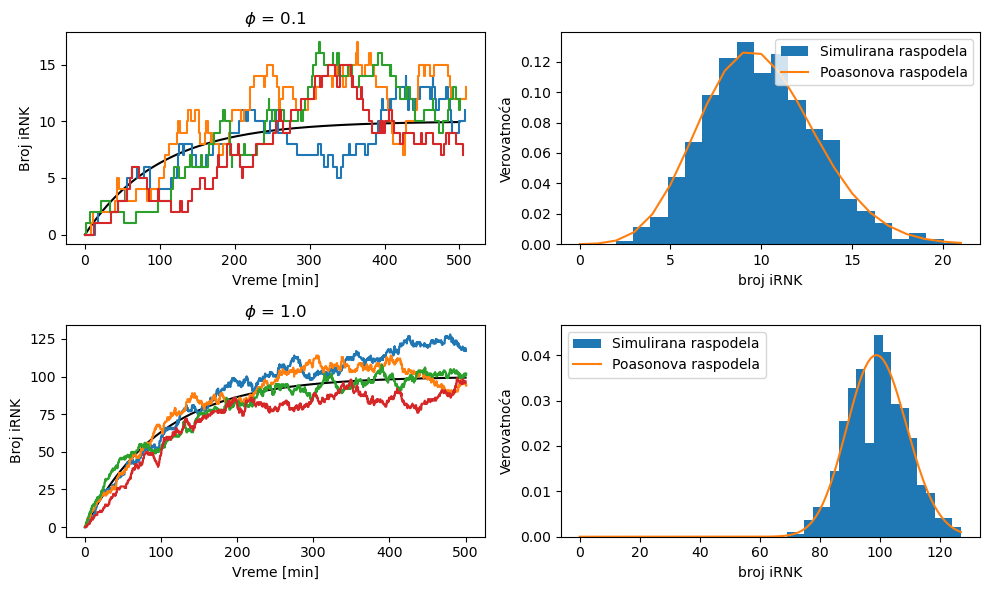

In [5]:
# Grafici
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

for row, phi in enumerate(phis):

    # Trajektorije
    ax1 = axes[row, 0]

    t_det = np.linspace(0, T, 500)
    ax1.plot(t_det, deterministic(phi, lam, t_det), color="k")

    for i in range(4):
        times, counts, i = gillespie(phi, lam, T)
        ax1.step(times, counts, where="post")

    ax1.set_title(f"$\phi$ = {phi}")
    ax1.set_xlabel("Vreme [min]")
    ax1.set_ylabel("Broj iRNK")

    # Histogrami
    ax2 = axes[row, 1]

    final_counts = []
    for i in range(N):
        i, i, nT = gillespie(phi, lam, T)
        final_counts.append(nT)

    ax2.hist(final_counts, bins=20, density=True, label="Simulirana raspodela")

    mu = deterministic(phi, lam, T)
    k = np.arange(0, max(final_counts) + 1)
    ax2.plot(k, poisson.pmf(k, mu), label="Poasonova raspodela")

    ax2.set_xlabel("broj iRNK")
    ax2.set_ylabel("Verovatnoća")
    ax2.legend()

plt.tight_layout()
plt.show()